In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

## Loading the Dataset

In [17]:

iris_df = pd.read_csv("iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Extracting the features

In [9]:

X = iris_df.iloc[:, :-1].values  # Using all attributes

## K-means clustering

In [10]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
kmeans_sse = kmeans.inertia_

## K-medoids clustering

In [11]:

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X)
kmedoids_labels = kmedoids.labels_
kmedoids_centers = kmedoids.cluster_centers_

## Plotting K-means Clusters

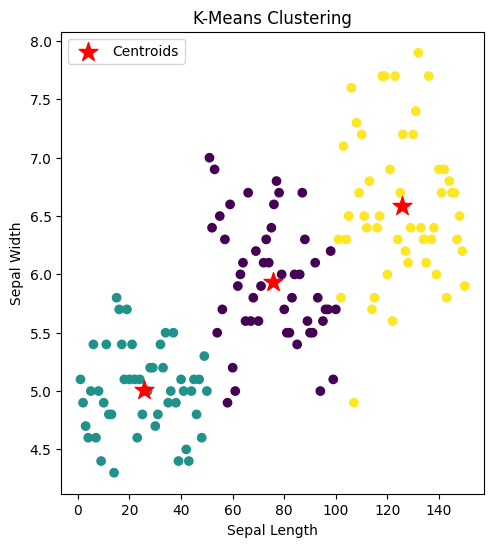

In [12]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

## Plotting K-medoids Clusters

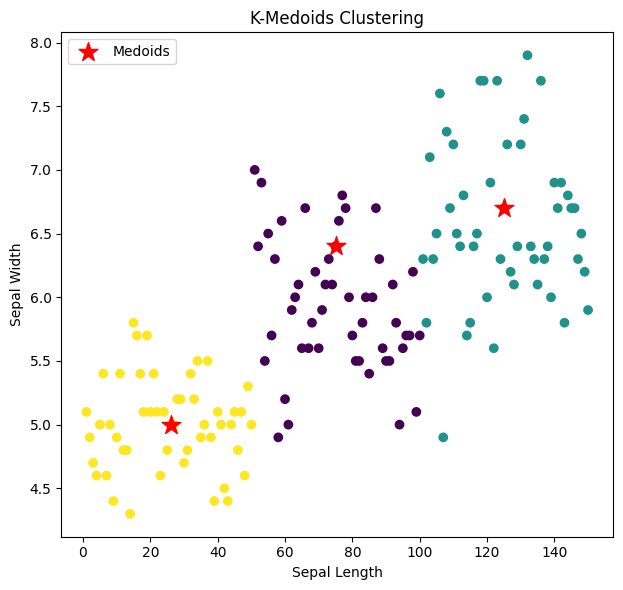

In [15]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids_centers[:, 0], kmedoids_centers[:, 1], marker='*', s=200, c='red', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.tight_layout()
plt.show()

## Counting points belonging to each cluster

In [13]:

kmeans_cluster_counts = np.bincount(kmeans_labels)
kmedoids_cluster_counts = np.bincount(kmedoids_labels)

print("K-Means Cluster Counts:", kmeans_cluster_counts)
print("K-Medoids Cluster Counts:", kmedoids_cluster_counts)

K-Means Cluster Counts: [50 50 50]
K-Medoids Cluster Counts: [50 50 50]


## Sum of Square Error (SSE)

In [16]:

print("K-Means Sum of Square Error (SSE):", kmeans_sse)

K-Means Sum of Square Error (SSE): 31326.886799999997
